<a href="https://colab.research.google.com/github/Sndzzz/Traffic-Sign-Classification/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GEREKLİ KÜTÜPHANELER

In [ ]:
!pip install tensorflow numpy pandas matplotlib opencv-python tqdm keras scikit-learn Pillow kaggle

KAGGLE API İLE VERİ SETİ ÇEKME

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip -o /content/gtsrb-german-traffic-sign.zip -d /content/

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/train/5/00005_00053_00010.png  
  inflating: /content/train/5/00005_00053_00011.png  
  inflating: /content/train/5/00005_00053_00012.png  
  inflating: /content/train/5/00005_00053_00013.png  
  inflating: /content/train/5/00005_00053_00014.png  
  inflating: /content/train/5/00005_00053_00015.png  
  inflating: /content/train/5/00005_00053_00016.png  
  inflating: /content/train/5/00005_00053_00017.png  
  inflating: /content/train/5/00005_00053_00018.png  
  inflating: /content/train/5/00005_00053_00019.png  
  inflating: /content/train/5/00005_00053_00020.png  
  inflating: /content/train/5/00005_00053_00021.png  
  inflating: /content/train/5/00005_00053_00022.png  
  inflating: /content/train/5/00005_00053_00023.png  
  inflating: /content/train/5/00005_00053_00024.png  
  inflating: /content/train/5/00005_00053_00025.png  
  inflating: /content/train/5/00005_00053_00026.png  
  inflating: /content/train/5/00005

In [ ]:
import numpy as np
import os
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y_test = pd.read_csv('/content/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(os.path.join("/content", img))
    image = image.resize((30, 30))
    image = np.array(image)
    data.append(image)

X = np.array(data)

X = X / 255.0

y = to_categorical(labels, num_classes=43)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (10104, 30, 30, 3)
X_test shape: (2526, 30, 30, 3)


MODEL OLUŞTURMA

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(30,30,3)),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(43, activation='softmax')
    ])


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

MODEL EĞİTME

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val)
    )
    return history

history = train_model(model, X_train, y_train, X_test, y_test)

Epoch 1/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1562 - loss: 3.2430 - val_accuracy: 0.6172 - val_loss: 1.4721
Epoch 2/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5295 - loss: 1.6147 - val_accuracy: 0.8428 - val_loss: 0.6197
Epoch 3/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6989 - loss: 0.9597 - val_accuracy: 0.9236 - val_loss: 0.4061
Epoch 4/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7914 - loss: 0.6757 - val_accuracy: 0.9553 - val_loss: 0.2275
Epoch 5/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8407 - loss: 0.4992 - val_accuracy: 0.9656 - val_loss: 0.1694
Epoch 6/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8652 - loss: 0.4109 - val_accuracy: 0.9723 - val_loss: 0.1118
Epoch 7/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8856 - loss: 0.3366 - val_accuracy: 0.9774 - val_loss: 0.1019
Epoch 8/20
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8933 - loss: 0.3103 - val_accuracy: 

TEST DOĞRULUĞU

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def test_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(true_labels, pred_labels)
    print(f"Test Accuracy: {accuracy:.4f}")

test_model(model, X_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.9929


ACCURARCY VE LOSS GRAFİKLERİ

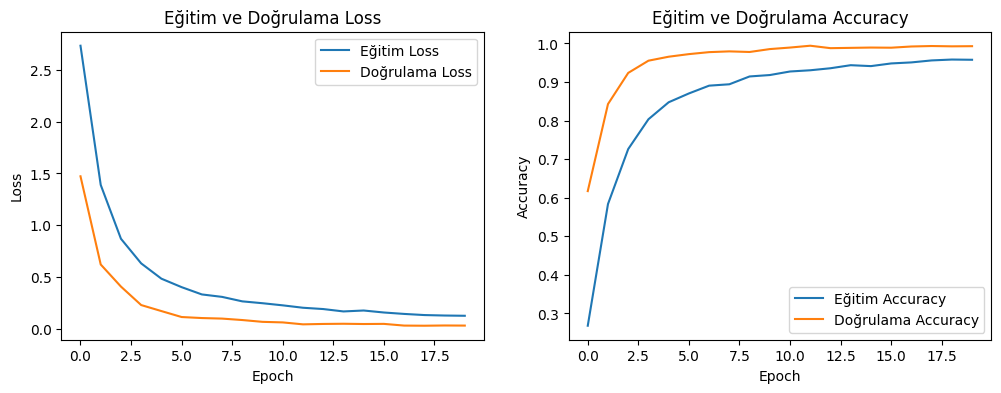

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Eğitim Loss')
    plt.plot(history.history['val_loss'], label='Doğrulama Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Eğitim Accuracy')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Accuracy')

    plt.show()

plot_training_history(history)

ÖRNEK ÇIKARIM FONKSİYONU

In [ ]:
import numpy as np
from PIL import Image

def predict_image(model, image_path, class_labels):

    image = Image.open(image_path)
    image = image.resize((30, 30))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)

    print(f"Tahmin Edilen Sınıf: {class_labels[predicted_class]}")
    print(f"Olasılık Değeri: {confidence:.4f}")

    return predicted_class, confidence

class_labels = [str(i) for i in range(43)]
image_path = "/content/Test/00000.png"
predict_image(model, image_path, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Tahmin Edilen Sınıf: 16
Olasılık Değeri: 1.0000


(16, 0.9999987)

In [ ]:
image_path = "/content/Test/00005.png"
predict_image(model, image_path, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmin Edilen Sınıf: 38
Olasılık Değeri: 1.0000


(38, 1.0)

In [ ]:
import pandas as pd

test_data = pd.read_csv("/content/Test.csv")

image_name = "00005.png"
true_label = test_data[test_data["Path"].str.contains(image_name)]["ClassId"].values[0]

print(f"Gerçek Sınıf: {true_label}")

Gerçek Sınıf: 38


MODEL KAYDETME

In [ ]:
# Modeli kaydet
model.save("traffic_sign_model.h5")

# Kaydedilen dosyaları kontrol et
import os
print(os.listdir())  # Dosyaların güncellenip güncellenmediğini kontrol et

['.config', 'traffic_sign_model.h5', 'test', 'Meta.csv', 'Test.csv', 'Train.csv', 'Train', 'kaggle.json', 'Meta', 'meta', 'Test', 'gtsrb-german-traffic-sign.zip', 'train', 'sample_data']


MODEL İNDİRME

In [ ]:
import shutil
from google.colab import files

# ZIP dosyası oluştur
shutil.make_archive("traffic_sign_model", 'zip', ".", "traffic_sign_model.h5")

# ZIP dosyasını indir
files.download("traffic_sign_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>